# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
city_number = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

x = -1

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)



607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:


for city in cities[:50]:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    try:
        
        #get data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_number.append(weather_json['id'])
        city_name.append(weather_json['name'])
        latitude.append(weather_json['coord']['lon'])
        temperature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        x = x + 1
        print(f'City Number: {city_number[x]} City Name: {city_name[x]}')

    except:
        
        print("city not found")





City Number: 1650434 City Name: Bambanglipuro
city not found
City Number: 3833367 City Name: Ushuaia
City Number: 686090 City Name: Asău
City Number: 3466307 City Name: Chapada dos Guimarães
City Number: 4031574 City Name: Provideniya
City Number: 4032243 City Name: Vaini
City Number: 3576994 City Name: Cockburn Town
City Number: 5855927 City Name: Hilo
City Number: 6201424 City Name: Mataura
City Number: 2163355 City Name: Hobart
City Number: 5866583 City Name: Saint Paul Harbor
City Number: 3883457 City Name: Lebu
City Number: 6165406 City Name: Thompson
City Number: 1282256 City Name: Hithadhoo
City Number: 4033356 City Name: Tiarei
City Number: 2063523 City Name: Perth
City Number: 3369157 City Name: Cape Town
City Number: 777019 City Name: Vardø
City Number: 3382160 City Name: Cayenne
City Number: 1015776 City Name: Bredasdorp
City Number: 3831208 City Name: Qaanaaq
City Number: 5106841 City Name: Albany
city not found
City Number: 2172880 City Name: Byron Bay
City Number: 6089245

In [5]:
print(city_name, city_number, latitude, temperature, humidity, cloudiness, wind_speed)

['Bambanglipuro', 'Ushuaia', 'Asău', 'Chapada dos Guimarães', 'Provideniya', 'Vaini', 'Cockburn Town', 'Hilo', 'Mataura', 'Hobart', 'Saint Paul Harbor', 'Lebu', 'Thompson', 'Hithadhoo', 'Tiarei', 'Perth', 'Cape Town', 'Vardø', 'Cayenne', 'Bredasdorp', 'Qaanaaq', 'Albany', 'Byron Bay', 'Norman Wells', 'Upernavik', 'Te Anau', 'Khatanga', 'Lompoc', 'Vostok', 'Busselton', 'Mangai', 'Henties Bay', 'George Town', 'Ostrovnoy', 'Rikitea', 'Chapais', 'Rawson', "Severo-Kuril'sk", 'Castro', 'Jamestown', 'Punta Arenas', 'Kutum', 'Bluff', 'Orotukan', 'Kumul', 'Jiuquan', 'Kapaa'] [1650434, 3833367, 686090, 3466307, 4031574, 4032243, 3576994, 5855927, 6201424, 2163355, 5866583, 3883457, 6165406, 1282256, 4033356, 2063523, 3369157, 777019, 3382160, 1015776, 3831208, 5106841, 2172880, 6089245, 3418910, 2181625, 2022572, 5367788, 2013279, 2075265, 2313084, 3356832, 1735106, 556268, 4030556, 5919850, 3839307, 2121385, 3466704, 5122534, 3874787, 371745, 2206939, 2122414, 1529484, 1279945, 5848280] [110.28

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_results = pd.DataFrame({"City Name" : city_name,
                              "City Number": city_number,
                              "Latitude" : latitude,
                              "Temperature" : temperature,
                              "Humidity" : humidity,
                              "Cloudiness" : cloudiness,
                              "Wind Speed" : wind_speed})

city_results.to_csv("City Results", encoding = "utf-8", index = False)

In [7]:
city_results

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Bambanglipuro,1650434,110.2833,301.34,76,90,4.00
1,Ushuaia,3833367,-68.3000,292.15,45,40,6.17
2,Asău,686090,26.4000,274.82,72,100,1.50
3,Chapada dos Guimarães,3466307,-55.7497,299.15,78,40,3.09
4,Provideniya,4031574,-173.3000,250.15,64,0,8.00
5,Vaini,4032243,-175.2000,301.15,83,75,6.17
6,Cockburn Town,3576994,-71.1419,298.20,77,3,8.76
7,Hilo,5855927,-155.0900,298.15,57,20,4.63
8,Mataura,6201424,168.8643,283.16,88,100,5.54
9,Hobart,2163355,147.3294,299.26,40,0,4.12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid_cities = []

#  Get the indices of cities that have humidity over 100%.
#get a list of cities that have humidity < 100
humid_cities = city_results[city_results["Humidity"] > 100].index

print(humid_cities)


Int64Index([], dtype='int64')


In [9]:
clean_city_data = city_results.drop(humid_cities,inplace = False)

clean_city_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Bambanglipuro,1650434,110.2833,301.34,76,90,4.00
1,Ushuaia,3833367,-68.3000,292.15,45,40,6.17
2,Asău,686090,26.4000,274.82,72,100,1.50
3,Chapada dos Guimarães,3466307,-55.7497,299.15,78,40,3.09
4,Provideniya,4031574,-173.3000,250.15,64,0,8.00
5,Vaini,4032243,-175.2000,301.15,83,75,6.17
6,Cockburn Town,3576994,-71.1419,298.20,77,3,8.76
7,Hilo,5855927,-155.0900,298.15,57,20,4.63
8,Mataura,6201424,168.8643,283.16,88,100,5.54
9,Hobart,2163355,147.3294,299.26,40,0,4.12


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#retrieve the Temperature that will be used each time
latitude = clean_city_data["Latitude"]

##?how do I decide which goes first - latitued or humidity 

## Latitude vs. Temperature Plot

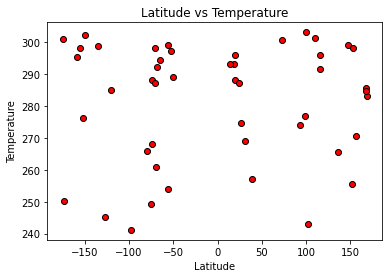

In [11]:
temperature = clean_city_data["Temperature"]

#using matplotlib
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(('Latitude vs Temperature'))


plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

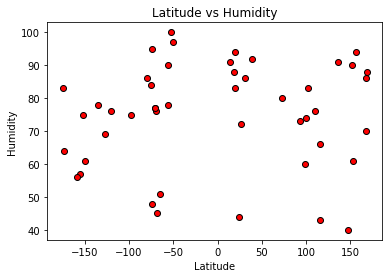

In [12]:
humidity = clean_city_data["Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(('Latitude vs Humidity'))

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

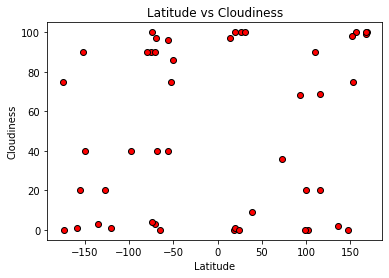

In [13]:
cloudiness = clean_city_data["Cloudiness"]

plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(('Latitude vs Cloudiness'))

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

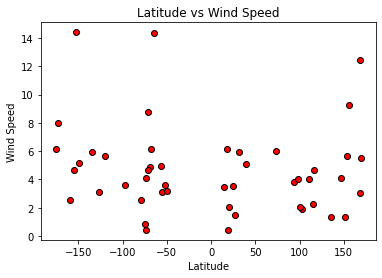

In [15]:
wind_speed = clean_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(('Latitude vs Wind Speed'))

plt.show

## Linear Regression

In [17]:
#the starter code had from scipy.stats import linregress

w_slope, w_intercept, w_cap_r, w_cap_p, w_cap_std_err = linregress(latitude, humidity)


print(w_slope)

0.012116461990831925


In [18]:
#function
# Add the linear regression equation and line to plot
def find_lin_reg(x_values, y_values, title, cordinates):
#x_values = housing_data['RM']
#y_values = housing_data['MEDV']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [19]:
northern_data = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
southern_data = clean_city_data.loc[clean_city_data["Latitude"]< 0]
southern_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
1,Ushuaia,3833367,-68.3000,292.15,45,40,6.17
3,Chapada dos Guimarães,3466307,-55.7497,299.15,78,40,3.09
4,Provideniya,4031574,-173.3000,250.15,64,0,8.00
5,Vaini,4032243,-175.2000,301.15,83,75,6.17
6,Cockburn Town,3576994,-71.1419,298.20,77,3,8.76
7,Hilo,5855927,-155.0900,298.15,57,20,4.63
10,Saint Paul Harbor,5866583,-152.4072,276.15,75,90,14.40
11,Lebu,3883457,-73.6500,288.27,95,4,4.10
12,Thompson,6165406,-97.8558,241.15,75,40,3.60
14,Tiarei,4033356,-149.3333,302.15,61,40,5.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

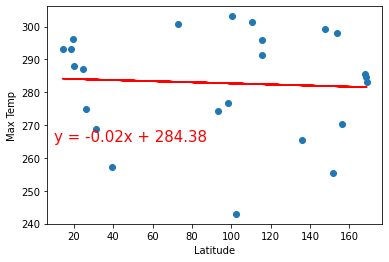

In [20]:
x_values = northern_data["Latitude"]
y_values = northern_data["Temperature"]

find_lin_reg(x_values, y_values,'Max Temp', (10,265))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

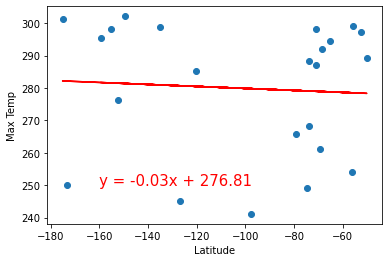

In [21]:
x_values = southern_data["Latitude"]
y_values = southern_data["Temperature"]

find_lin_reg(x_values, y_values,'Max Temp', (-160,250))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

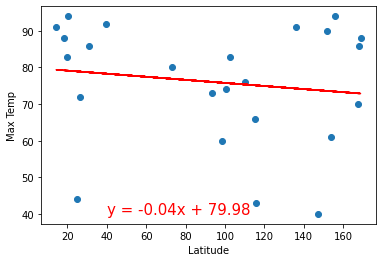

In [24]:
x_values = northern_data["Latitude"]
y_values = northern_data["Humidity"]

find_lin_reg(x_values, y_values,'Max Temp', (40,40))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

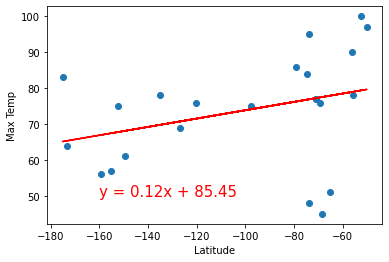

In [29]:
x_values = southern_data["Latitude"]
y_values = southern_data["Humidity"]

find_lin_reg(x_values, y_values,'Max Temp', (-160,50))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

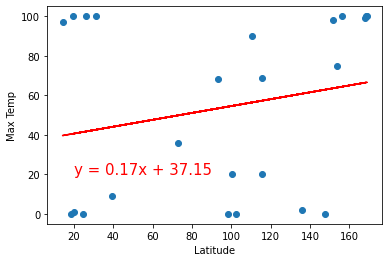

In [32]:
x_values = northern_data["Latitude"]
y_values = northern_data["Cloudiness"]

find_lin_reg(x_values, y_values,'Max Temp', (20,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

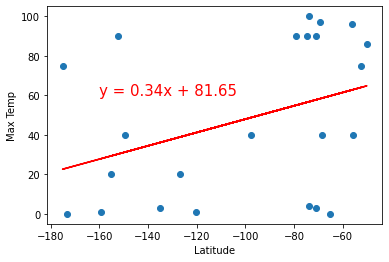

In [34]:
x_values = southern_data["Latitude"]
y_values = southern_data["Cloudiness"]

find_lin_reg(x_values, y_values,'Max Temp', (-160,60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

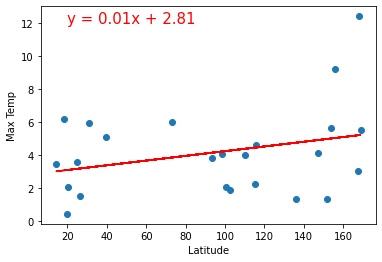

In [37]:
x_values = northern_data["Latitude"]
y_values = northern_data["Wind Speed"]

find_lin_reg(x_values, y_values,'Max Temp', (20,12))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

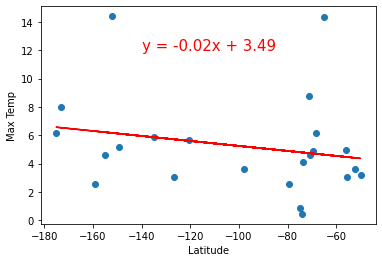

In [44]:
x_values = southern_data["Latitude"]
y_values = southern_data["Wind Speed"]

find_lin_reg(x_values, y_values,'Max Temp', (-140, 12))